In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.ExcelFile('MM_1990-2017.xls')

In [3]:
data.sheet_names

['Sheet1']

In [5]:
df = data.parse('Sheet1')

In [8]:
df.head()
df.head()["Reported participation in protest"]

0     1000s
1       500
2      100s
3       200
4    110000
Name: Reported participation in protest, dtype: object

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14973 entries, 0 to 14972
Data columns (total 32 columns):
Protest ID #                                          14973 non-null int64
Country name                                          14973 non-null object
COW Country Code                                      14973 non-null int64
Year                                                  14973 non-null int64
Region                                                14973 non-null object
Protest                                               14973 non-null int64
what number protest is this for this country year?    14973 non-null int64
Start Day                                             13227 non-null float64
Start Month                                           13227 non-null float64
Start Year                                            13227 non-null float64
End Day                                               13227 non-null float64
End Month                                             13

In [20]:
df["Reported participation in protest"].astype('int')
# df["Reported participation in protest"]

ValueError: invalid literal for int() with base 10: '1000s'

In [26]:
# df["Reported participation in protest"].head()
# len(surveys_df[pd.isnull(surveys_df.wgt)])

# pretty significant amount ~8% missing 
print(len(df[pd.isnull(df["Reported participation in protest"])])/len(df["Reported participation in protest"]))


0.08274894810659186


In [154]:
nparticipants = df["Reported participation in protest"]
# nparticipants = pd.to_numeric(nparticipants, errors="coerce")
# about half of the data cannot be converted to numeric
len(nparticipants[pd.isnull(nparticipants)])/len(df["Reported participation in protest"])
# nparticipants = df["Reported participation in protest"].astype(str).str.strip()
# nparticipants.astype(str)
nparticipants = nparticipants.astype(str)
(nparticipants.str.findall(r'(\b[0-9]+\b)|(\b[0-9]+s\b)|(\b[0-9]+-[0-9]+\b)|(\b[0-9]+\+)|(>[0-9]+\b)').astype(str) != '[]').sum()
#(nparticipants.str.findall(r'(\b[0-9]+\+)').astype(str) != '[]').sum()
#(nparticipants.str.findall(r'(\b[0-9]+-[0-9]+\b)').astype(str) != '[]').sum()
#(nparticipants.str.findall(r'(>[0-9]+\b)').astype(str) != '[]').sum()
(nparticipants.str.findall(r'\.').astype(str) != '[]').sum()
(nparticipants.str.findall(r'^$').astype(str) != '[]').sum()



0

In [92]:
# nparticipants = nparticipants.astype(str)
#npart_numeric = npart_numeric.astype(str)
#npart_numeric = df["Reported participation in protest"].str.findall(r'(\b[0-9]+\b)')
#len(npart_numeric[pd.isnull(npart_numeric)])
#npart_numeric
# npart_numeric[npart_numeric == '[]']
# nparticipants

0             NaN
1           500.0
2             NaN
3           200.0
4        110000.0
5        110000.0
6             NaN
7             NaN
8         10000.0
9          6000.0
10         3000.0
11            NaN
12            NaN
13       126000.0
14        45000.0
15         2000.0
16          400.0
17          500.0
18            NaN
19          250.0
20       170000.0
21          300.0
22          200.0
23            NaN
24            NaN
25          200.0
26          300.0
27         1000.0
28           50.0
29           50.0
           ...   
14943       300.0
14944       100.0
14945      1000.0
14946       100.0
14947      1000.0
14948        60.0
14949         NaN
14950         NaN
14951        50.0
14952      1300.0
14953       100.0
14954       300.0
14955        50.0
14956       150.0
14957       100.0
14958         NaN
14959         NaN
14960         NaN
14961      3000.0
14962      5000.0
14963       300.0
14964       500.0
14965         NaN
14966      1000.0
14967     

In [204]:
dictionary = {}
occ = pd.read_csv('occupations/occupations.csv')
for i in range(0, len(occ['Occupations'])):
    print(occ['Occupations'][i].lower())
    if occ['Occupations'][i].lower() not in dictionary:
        dictionary[occ['Occupations'][i].lower()] = 1
    if occ['Occupations'][i].lower()+'s' not in dictionary:
        dictionary[occ['Occupations'][i].lower()+'s'] = 1
'fisherman' in dictionary

accountant
accounts assistant
accounts clerk
accounts manager
accounts staff
acoustic engineer
actor
actress
actuary
acupuncturist
adjustor
administration assistant
administration clerk
administration manager
administration staff
administrator
advertising agent
advertising assistant
advertising clerk
advertising contractor
advertising executive
advertising manager
advertising staff
aerial erector
aerobic instructor
aeronautical engineer
agent
air traffic controller
aircraft designer
aircraft engineer
aircraft maintenance engineer
aircraft surface finisher
airman
airport controller
airport manager
almoner
ambulance controller
ambulance crew
ambulance driver
amusement arcade worker
anaesthetist
analyst
analytical chemist
animal breeder
anthropologist
antique dealer
applications engineer
applications programmer
arbitrator
arborist
archaeologist
architect
archivist
area manager
armourer
aromatherapist
art critic
art dealer
art historian
art restorer
artexer
artist
arts
assembly worker
asse

False

In [181]:
'farmers' in dictionary

True

In [177]:
df['Protester Group Identity'].astype(str)

0                                              unspecified
1                             (separatist) Parti Quebecois
2                                           Mohawk Indians
3                                           Mohawk Indians
4                        Public Service Alliance of Canada
5                        Public Service Alliance of Canada
6                                              unspecified
7                                environmental activitists
8                                gun owners and supporters
9                                                 students
10                                             unspecified
11                                        Chippewa Indians
12                                            labor unions
13                            Ontario Teachers' Federation
14                        Canadian Union of Postal Workers
15                                  french-speaking youths
16                                             unspecifi

In [182]:
'students' in dictionary 

True

In [206]:
def matchingtext(s):
    li = s.split(' ')
    for x in li:
        if x in dictionary:
            return True
    return False
x = df['Protester Group Identity'].astype(str).str.strip()
y = x.apply(lambda s: matchingtext(s))
(y == True).sum()

2049

In [386]:
df['Protester Group Identity'] = df['Protester Group Identity'].astype(str)
# x = (df['Protester Group Identity'].str.findall(r'(student)|(students)|(youth)|(youths)').astype(str) != '[]')
x = df.loc[df['Protester Group Identity'].str.findall(r'(student)|(students)|(youth)|(youths)').astype(str) != '[]']
x['Protester Group Identity']
x = x.loc[x["Reported participation in protest"].str.findall(r'(\b[0-9]+\b)|(\b[0-9]+s\b)|(\b[0-9]+-[0-9]+\b)|(\b[0-9]+\+)|(>[0-9]+\b)').astype(str) != '[]']
len(x)


1332

(array([ 640.,   48.,   32.,   17.,  215.,    1.,    1.,    5.,    0.,
          44.,    0.,    6.,    1.,    0.,   33.,    0.,    1.,    0.,
          22.,    0.,    0.,    0.,    0.,   36.,    0.,    0.,    0.,
           0.,   10.,    0.,    0.,    0.,   15.,    0.,    0.,    1.,
           0.,    4.,    0.,    1.]),
 array([  2.00000000e+00,   2.14450000e+02,   4.26900000e+02,
          6.39350000e+02,   8.51800000e+02,   1.06425000e+03,
          1.27670000e+03,   1.48915000e+03,   1.70160000e+03,
          1.91405000e+03,   2.12650000e+03,   2.33895000e+03,
          2.55140000e+03,   2.76385000e+03,   2.97630000e+03,
          3.18875000e+03,   3.40120000e+03,   3.61365000e+03,
          3.82610000e+03,   4.03855000e+03,   4.25100000e+03,
          4.46345000e+03,   4.67590000e+03,   4.88835000e+03,
          5.10080000e+03,   5.31325000e+03,   5.52570000e+03,
          5.73815000e+03,   5.95060000e+03,   6.16305000e+03,
          6.37550000e+03,   6.58795000e+03,   6.80040000e+

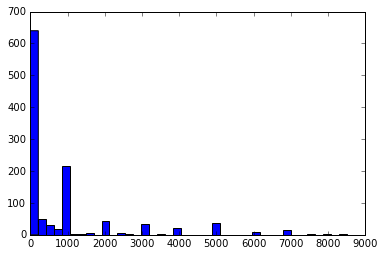

In [396]:
import re
def conv2bucket(s):
    val = re.findall(r'([0-9]+)', s)
    if len(val) != 0:
        # print(int(val[0]))
        x = int(val[0])
#         bucket = 0
#         if x >= 100 and x < 1000:
#             bucket = 1
#         elif x >= 1000 and x < 10000:
#             bucket = 2
#         elif x >= 10000 and x < 100000:
#             bucket = 3
#         else x >= 100000 and x < 1000000:
#             bucket = 4
#        return bucket
        return x
    return val
# (x["Reported participation in protest"].astype(str).apply(lambda y: conv2bucket(y)).astype(str) == '[]').sum()
x["Reported participation in protest"] = x["Reported participation in protest"].astype(str).apply(lambda y: conv2bucket(y))
# x["Reported participation in protest"]
#x["Reported participation in protest"]
x = x.loc[x["Reported participation in protest"].astype(str) != '[]']
x = x.loc[x["Reported participation in protest"] < 10000]
len(x["Reported participation in protest"])
# plt.hist(x["Reported participation in protest"].tolist(), bins=5)
# x.hist(column="Reported participation in protest")
# plt.hist(x["Reported participation in protest"])

%matplotlib inline

# plt.hist([1,4,2,1,2,3,5,6])
(x["Reported participation in protest"] < 10000).sum()
# (x["Reported participation in protest"] < 1000).sum()
x.quantile(0.90)
plt.hist(x["Reported participation in protest"], bins=40)
# some protests in the millions
# ignore ~10% of data

In [398]:
x.quantile(0.5)

Protest ID #                                          4.372017e+09
COW Country Code                                      4.370000e+02
Year                                                  2.003000e+03
Protest                                               1.000000e+00
what number protest is this for this country year?    4.000000e+00
Start Day                                             1.600000e+01
Start Month                                           5.000000e+00
Start Year                                            2.003000e+03
End Day                                               1.700000e+01
End Month                                             5.000000e+00
End Year                                              2.003000e+03
Protester Violence                                    0.000000e+00
Reported participation in protest                     1.000000e+02
Name: 0.5, dtype: float64

In [400]:
x.hist(column="Region")

ValueError: num must be 1 <= num <= 0, not 1

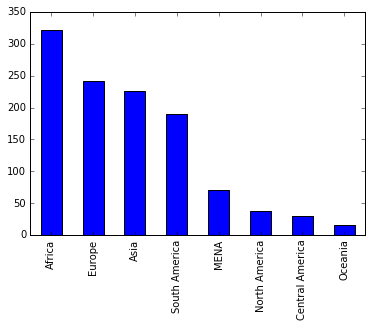

In [402]:
x['Region'].value_counts().plot(kind='bar')

In [403]:
x['Region'].value_counts()

Africa             321
Europe             242
Asia               226
South America      190
MENA                71
North America       38
Central America     30
Oceania             15
Name: Region, dtype: int64

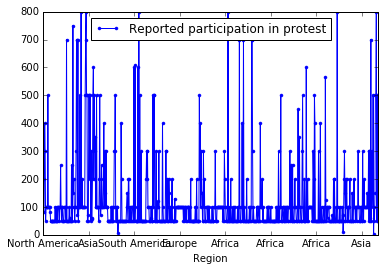

In [413]:
x['Primary State Response to protests [Response 1]'].value_counts()
g = x.loc[x["Reported participation in protest"] < 1000]
g.plot(x="Region", y="Reported participation in protest", marker=".")

In [414]:
plt.scatter(x["Region"], x["Reported participation in protest"])

ValueError: could not convert string to float: 'Oceania'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x119689378> (for post_execute):


ValueError: could not convert string to float: 'Oceania'

ValueError: could not convert string to float: 'Oceania'